<a href="https://colab.research.google.com/github/dineshkk15/hello-world/blob/main/Python/32_Matplotlib_Pandas_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Using Pandas

In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_month'] = df['job_posted_date'].dt.month
df.info()
job_counts = df['job_title_short'].value_counts()
job_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


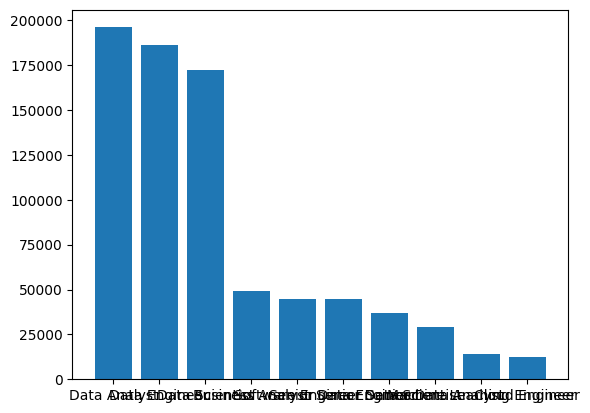

In [3]:
plt.bar(job_counts.index, job_counts)
plt.show()

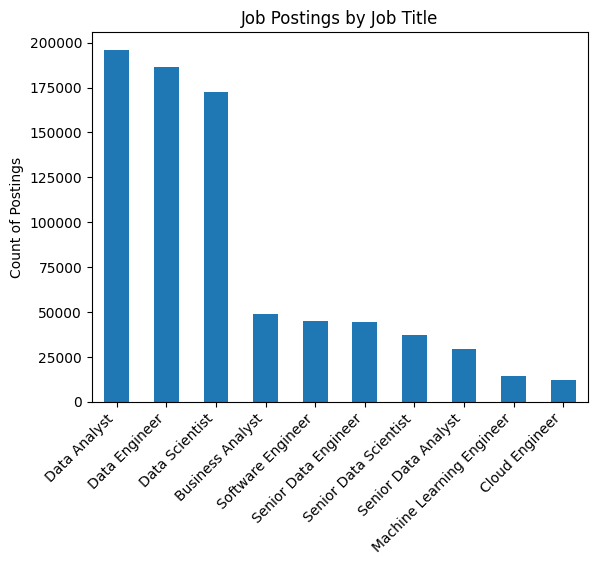

In [8]:
job_counts.plot(kind='bar')
plt.ylabel('Count of Postings')
plt.xlabel('')
plt.title('Job Postings by Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
df[['job_posted_month','salary_year_avg']].dropna(subset=['salary_year_avg'])
df1 = df.groupby('job_posted_month')['salary_year_avg'].mean()
print(df1)

job_posted_month
1     123007.422072
2     122913.927237
3     122947.810047
4     121856.551050
5     123656.747729
6     124321.135360
7     123470.572994
8     125819.429100
9     125222.984594
10    124606.653605
11    119817.184014
12    120199.423414
Name: salary_year_avg, dtype: float64


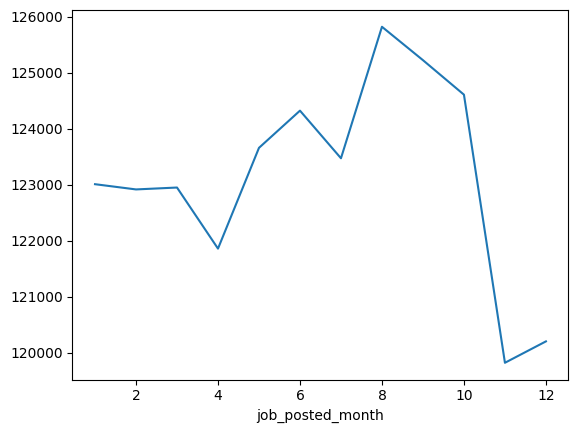

In [21]:
df1.plot(x='job_posted_month', y='mean', kind='line')
plt.show()

Load data.

In [ ]:
# Install datasets Library (if not already installed)
# !pip install -U datasets

# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Notes

It is possible to plot things using Pandas. While it's more common to use a dedicated library like Matplotlib for graphing, you can use Pandas to create graphs. This is mostly used as a way to quickly create a graph for an analysis.

We won't be focusing on it during this course but it's available if you want to.

View more on that [here](https://pandas.pydata.org/docs/user_guide/visualization.html).

## Plotting Series

Below is the data created in `29_Matplotlib_Plotting.ipynb`:

In [ ]:
job_counts = df['job_title_short'].value_counts()

job_counts

job_title_short
Data Analyst                 196593
Data Engineer                186678
Data Scientist               172727
Business Analyst              49160
Software Engineer             45019
Senior Data Engineer          44692
Senior Data Scientist         37076
Senior Data Analyst           29289
Machine Learning Engineer     14106
Cloud Engineer                12346
Name: count, dtype: int64

Plotting it with only Matplotlib:

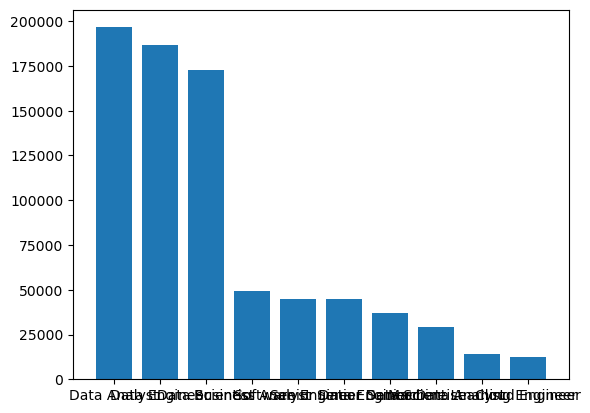

In [ ]:
plt.bar(job_counts.index, job_counts)
plt.show()

Note: We'll fix formatting in a bit...  

Anyway, this is the same chart but using `Pandas` to plot it instead.

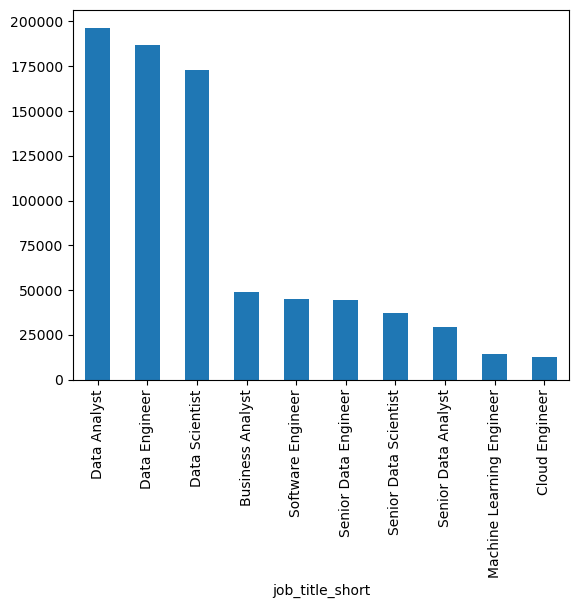

In [ ]:
job_counts.plot(kind='bar')
plt.show()

We can even customize all the labels just like we did in Matplotlib.

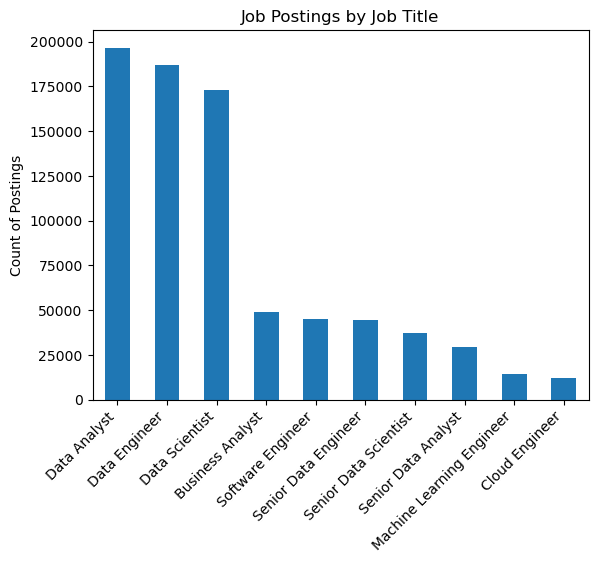

In [ ]:
job_counts.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Count of Postings')
plt.title('Job Postings by Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()

## Plotting Dataframes

<Axes: xlabel='job_posted_date'>

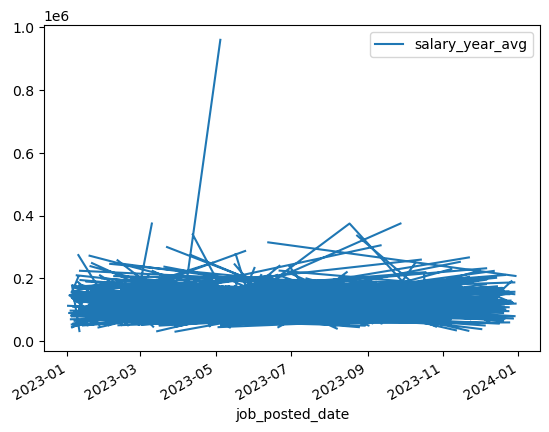

In [ ]:
df.plot(x='job_posted_date', y='salary_year_avg', kind='line')

The problem with DataFrames (at least large ones) is the data still may need to be cleaned up.

In [ ]:
# sort index by job posted date
df = df.set_index('job_posted_date')
df.sort_index(inplace=True)
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_posted_date,,,,,,,,,,,,,,,,
2022-12-31 06:01:15,Data Analyst,BA/Data Analyst with Oracle,"Irving, TX",via Big Country Jobs,Full-time,False,"Texas, United States",False,False,United States,None,NaN,NaN,LTI - Larsen & Toubro Infotech,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
2022-12-31 06:01:17,Data Analyst,Data Analyst III,"San Antonio, TX",via BeBee,Full-time,False,"Texas, United States",False,True,United States,None,NaN,NaN,Superior HealthPlan,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
2022-12-31 06:01:32,Senior Data Analyst,Senior Data Analyst,"Chicago, IL",via BeBee,Full-time,False,"Illinois, United States",True,False,United States,None,NaN,NaN,Quantum World Technologies Inc.,"['sql', 't-sql', 'mongo', 'python', 'java', 'o...","{'analyst_tools': ['tableau', 'alteryx', 'ssis..."
2022-12-31 06:02:02,Data Scientist,Data Scientist,"New York, NY",via Monster,Full-time,False,"New York, United States",False,True,United States,None,NaN,NaN,Afficiency,"['sql', 'r', 'python', 'java', 'kotlin', 'matl...","{'analyst_tools': ['tableau'], 'libraries': ['..."
2022-12-31 06:02:12,Senior Data Scientist,Senior Data Scientist,"Marysville, OH",via My Stateline Jobs,Full-time,False,"New York, United States",False,False,United States,None,NaN,NaN,Rudis,"['sql', 'r', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr..."


<Axes: xlabel='job_posted_date'>

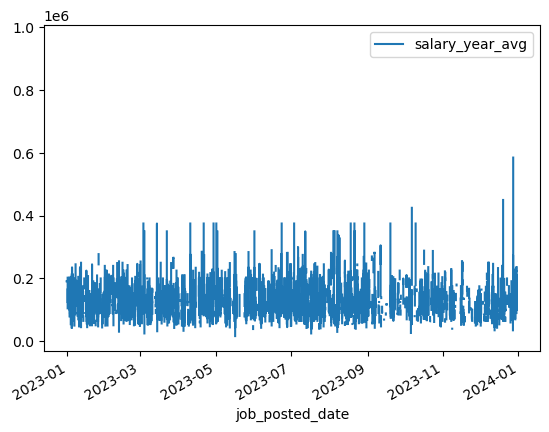

In [ ]:
df.plot(y='salary_year_avg', kind='line')